In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [33]:
dataset = pd.read_csv('vn.csv')
x = dataset.iloc[:, [2,3]].values
y = dataset.iloc[:, -1].values

In [34]:
print (x)

[[100   8]
 [ 87   9]
 [ 77   7]
 [ 69   9]
 [ 64   8]
 [ 62   7]
 [ 61   8]
 [ 57   8]
 [ 49   7]]


In [35]:
print (y)

[3 3 3 3 3 3 3 3 1]


In [36]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [37]:
print (x_train)

[[ 64   8]
 [ 49   7]
 [ 61   8]
 [ 69   9]
 [100   8]
 [ 62   7]]


In [38]:
print (x_test)

[[57  8]
 [77  7]
 [87  9]]


In [39]:
print (y_train)

[3 1 3 3 3 3]


In [40]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [41]:
print (x_train)

[[-0.22243716  0.24253563]
 [-1.17573927 -1.21267813]
 [-0.41309758  0.24253563]
 [ 0.09533021  1.69774938]
 [ 2.06548791  0.24253563]
 [-0.34954411 -1.21267813]]


In [42]:
print (x_test)

[[-0.66731148  0.24253563]
 [ 0.60375801 -1.21267813]
 [ 1.23929275  1.69774938]]


In [43]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB()

In [44]:
y_pred = classifier.predict(x_test)

In [45]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[3]]


<ipython-input-46-b72da52924eb>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set==j, 1],


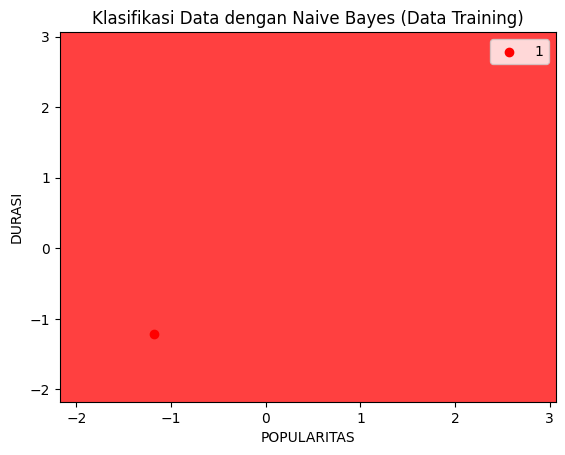

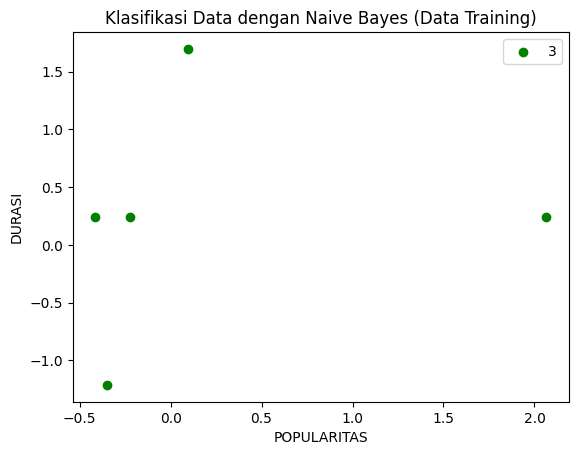

In [46]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min()-1, stop = x_set[:, 0].max() + 1, step=0.01),
                     np.arange(start = x_set[:, 0].min()-1, stop = x_set[:, 0].max() + 1, step=0.01))
plt.contourf(x1,x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.xlim(x2.min(), x2.max())
for i, j in enumerate (np.unique(y_set)):
  plt.scatter(x_set[y_set == j, 0], x_set[y_set==j, 1],
              c = ListedColormap(('red', 'green'))(i), label = j)
  plt.title('Klasifikasi Data dengan Naive Bayes (Data Training)')
  plt.xlabel('POPULARITAS')
  plt.ylabel('DURASI')
  plt.legend()
  plt.show()